Correct initial derivative v0 for P=-2: 4.76837158203125e-06
Eigenvalues of Jacobian: [0.0, 0.0]
Now, since eigenvalue is 0, this matrix is not jacobian


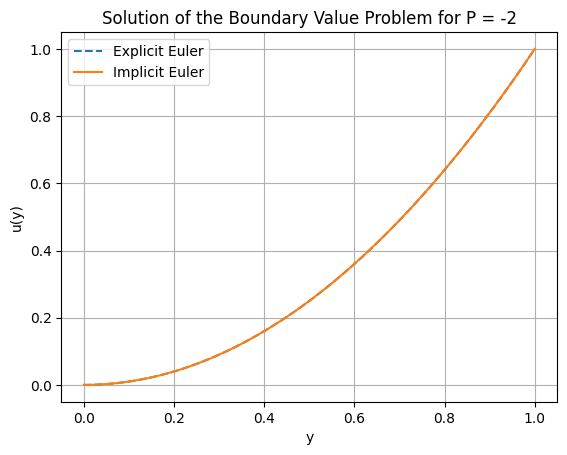

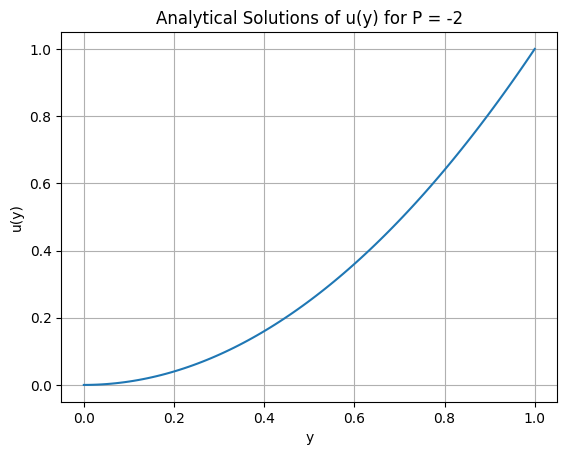

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from equilibria import *
# Function to define the system of ODEs
#the final code
def system_equations(u, v, P):
    du = v
    dv = -P
    return du, dv

# Function to compute the Jacobian programmatically using finite differences
def compute_jacobian(u, v, P, delta=1e-5):
    # Create the Jacobian matrix
    J = np.zeros((2,2))
    
    # Evaluate the system at the current state
    f0 = system_equations(u, v, P)
    
    # Compute partial derivatives using finite differences
    for i in range(2):  # Two variables: u and v
        # Perturb uHH
        if i == 0:  # Perturb u
            f1 = system_equations(u + delta, v, P)
            J[0][0] = (f1[0] - f0[0]) / delta  # du/du
            J[1][0] = (f1[1] - f0[1]) / delta  # dv/du
        else:  # Perturb v
            f1 = system_equations(u, v + delta, P)
            J[0][1] = (f1[0] - f0[0]) / delta  # du/dv
            J[1][1] = (f1[1] - f0[1]) / delta  # dv/dv

    return J

# Function to implement the Explicit Euler method for the system of ODEs
def explicit_euler(y0, v0, step_size, y_end, P):
    n_steps = int(y_end / step_size) + 1
    y_values = []
    u_values = []

    # Initialize values
    y = 0
    u = y0
    v = v0

    for _ in range(n_steps):
        y_values.append(y)
        u_values.append(u)

        # Update using Explicit Euler method
        u_new = u + step_size * v
        v_new = v - step_size * P

        # Update the values
        u = u_new
        v = v_new
        y += step_size

    return y_values, u_values

# Function to implement the Implicit Euler method for the system of ODEs
def implicit_euler(y0, v0, step_size, y_end, P):
    n_steps = int(y_end / step_size) + 1
    y_values = []
    u_values = []

    # Initialize values
    y = 0
    u = y0
    v = v0

    for _ in range(n_steps):
        y_values.append(y)
        u_values.append(u)

        # Implicit Euler update
        # Solve for v_next first
        v_next = v - step_size * P
        # Use v_next to update u_next
        u_next = u + step_size * v_next

        # Update values
        u = u_next
        v = v_next
        y += step_size

    return y_values, u_values

# Function to perform the shooting method
def shooting_method(P, y0, y_end, step_size):
    v0_lower = 0  # Lower bound for v0
    v0_upper = 10  # Upper bound for v0
    tolerance = 1e-5

    while (v0_upper - v0_lower) > tolerance:
        v0_mid = (v0_lower + v0_upper) / 2
        y_values, u_values = explicit_euler(y0, v0_mid, step_size, y_end, P)

        if u_values[-1] < 1:  # Adjust this condition based on final value you want to check
            v0_lower = v0_mid  # Increase v0
        else:
            v0_upper = v0_mid  # Decrease v0

    return (v0_lower + v0_upper) / 2

# Function to calculate eigenvalues for both methods
def calculate_eigenvalues(mat):
   return eigenvalues_via_qr(mat)

# Function to plot the results for a given value of P
def plot_results(P, y0, y_end, step_size):
    # Find the correct initial guess for v0 using the shooting method
    v0_correct = shooting_method(P, y0, y_end, step_size)
    print(f"Correct initial derivative v0 for P={P}: {v0_correct}")

    # Solve the initial value problem with the correct v0 using smaller step size for Explicit Euler
    smaller_step_size = 0.0001  # Smaller step size
    y_values_explicit, u_values_explicit = explicit_euler(y0, v0_correct, smaller_step_size, y_end, P)

    # Solve the initial value problem with the correct v0 using Implicit Euler
    y_values_implicit, u_values_implicit = implicit_euler(y0, v0_correct, smaller_step_size, y_end, P)

    # Calculate eigenvalues
    eigen_vals = calculate_eigenvalues(compute_jacobian(y0,y_end,P))
    print("Eigenvalues of Jacobian:", eigen_vals[0].tolist())
    print("Now, since eigenvalue is 0, this matrix is not jacobian")
    #print(f"Eigenvalue of Implicit Euler: {eigen_implicit}")

    # Plot the solutions
    plt.plot(y_values_explicit, u_values_explicit, label="Explicit Euler", linestyle='--')
    plt.plot(y_values_implicit, u_values_implicit, label="Implicit Euler", linestyle='-')
    plt.xlabel("y")
    plt.ylabel("u(y)")
    plt.title(f"Solution of the Boundary Value Problem for P = {P}")
    plt.legend()
    plt.grid()
    plt.show()


initial_value = 0  # Initial value for u
final_value = 1  # Final value for u
step_size = 0.000001  # Step size for the methods
import numpy as np
import matplotlib.pyplot as plt

#analytical functions
# Define the function for each P value
def plot_ana(P):
    def u_y(y, P):
        if P == -2:
            return y**2
        elif P == 0:
            return y
        elif P == 2:
            return -y**2 + 2*y
        elif P == 5:
            return -(5/2) * y**2 + 3*y
        elif P == 10:
            return -5 * y**2 + 6*y

    # Define the range for y
    y_values = np.linspace(0, 1, 100)



    # Plot each function
    #plt.figure(figsize=(10, 6))

    u_values = [u_y(y, P) for y in y_values]
    plt.plot(y_values, u_values)

    # Customize the plot
    plt.xlabel("y")
    plt.ylabel("u(y)")
    plt.title(f"Analytical Solutions of u(y) for P = {P}",)
    plt.grid(True)
    plt.show()

plot_results(-2, initial_value, final_value, step_size)
plot_ana(-2)


Correct initial derivative v0 for P=0: 0.9999990463256836
Eigenvalues of Jacobian: [0.0, 0.0]
Now, since eigenvalue is 0, this matrix is not jacobian


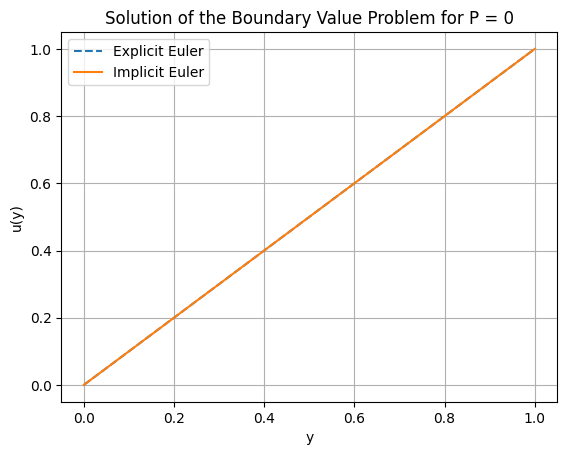

In [2]:
plot_results(0, initial_value, final_value, step_size)

Correct initial derivative v0 for P=2: 2.000002861022949
Eigenvalues of Jacobian: [0.0, 0.0]
Now, since eigenvalue is 0, this matrix is not jacobian


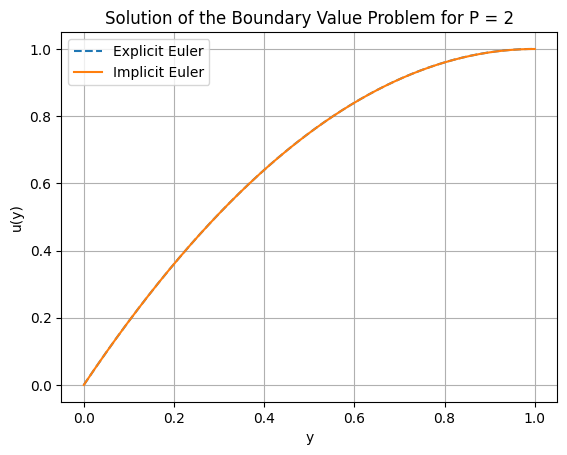

In [3]:
plot_results(2, initial_value, final_value, step_size)

Correct initial derivative v0 for P=5: 3.4999990463256836
Eigenvalues of Jacobian: [0.0, 0.0]
Now, since eigenvalue is 0, this matrix is not jacobian


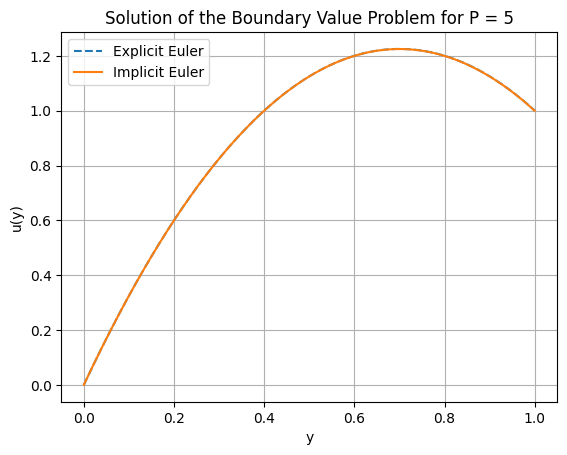

In [4]:
plot_results(5, initial_value, final_value, step_size)

Correct initial derivative v0 for P=10: 5.999999046325684
Eigenvalues of Jacobian: [0.0, 0.0]
Now, since eigenvalue is 0, this matrix is not jacobian


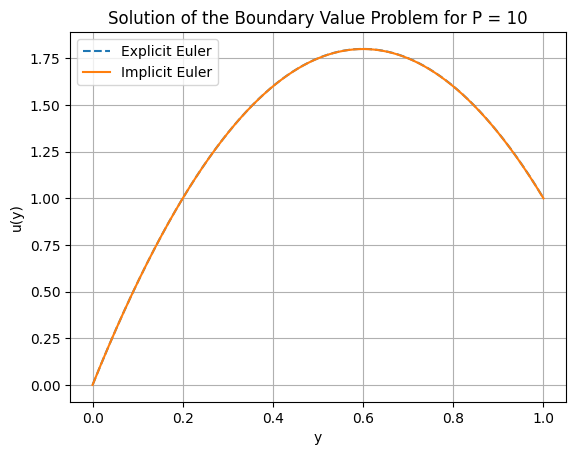

In [5]:
plot_results(10, initial_value, final_value, step_size)